<a href="https://www.kaggle.com/code/rishukumargupta/notebook02c72e91a5?scriptVersionId=134722885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# DATA PREPARATION
> 1. Data Clearning 
> 2. Data Exporation
> 3. Data Spliting 
> 4. Traing Model
> 5. Evaluate The Model 
> 6. Improve The Model

## 1. Data Cleanig

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.duplicated().sum()

723

## 2. Data Exporation

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#importing the required library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
num_var=[]
cat_var=[]

for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        num_var.append(c)
        
for c in df.columns:
    if df[c].dtype == 'object':
        cat_var.append(c)        

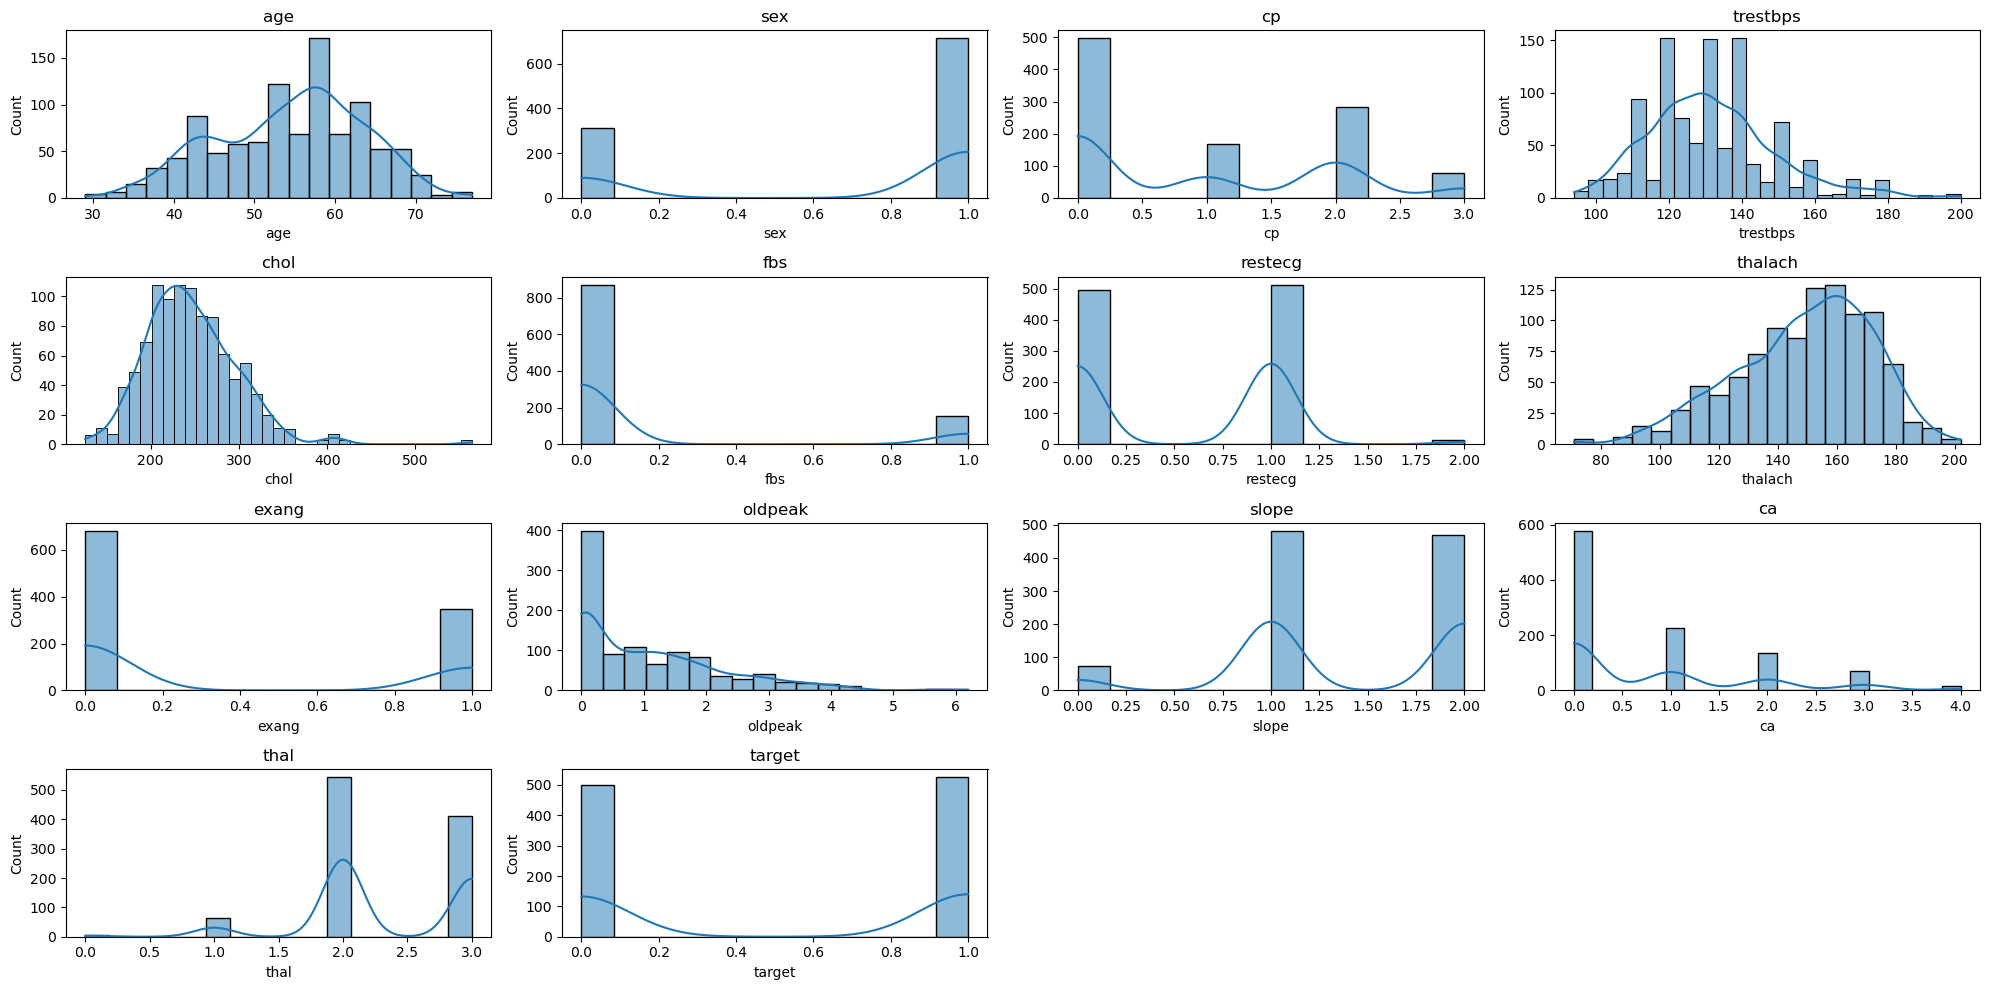

In [12]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(var)

plt.tight_layout()
plt.show()

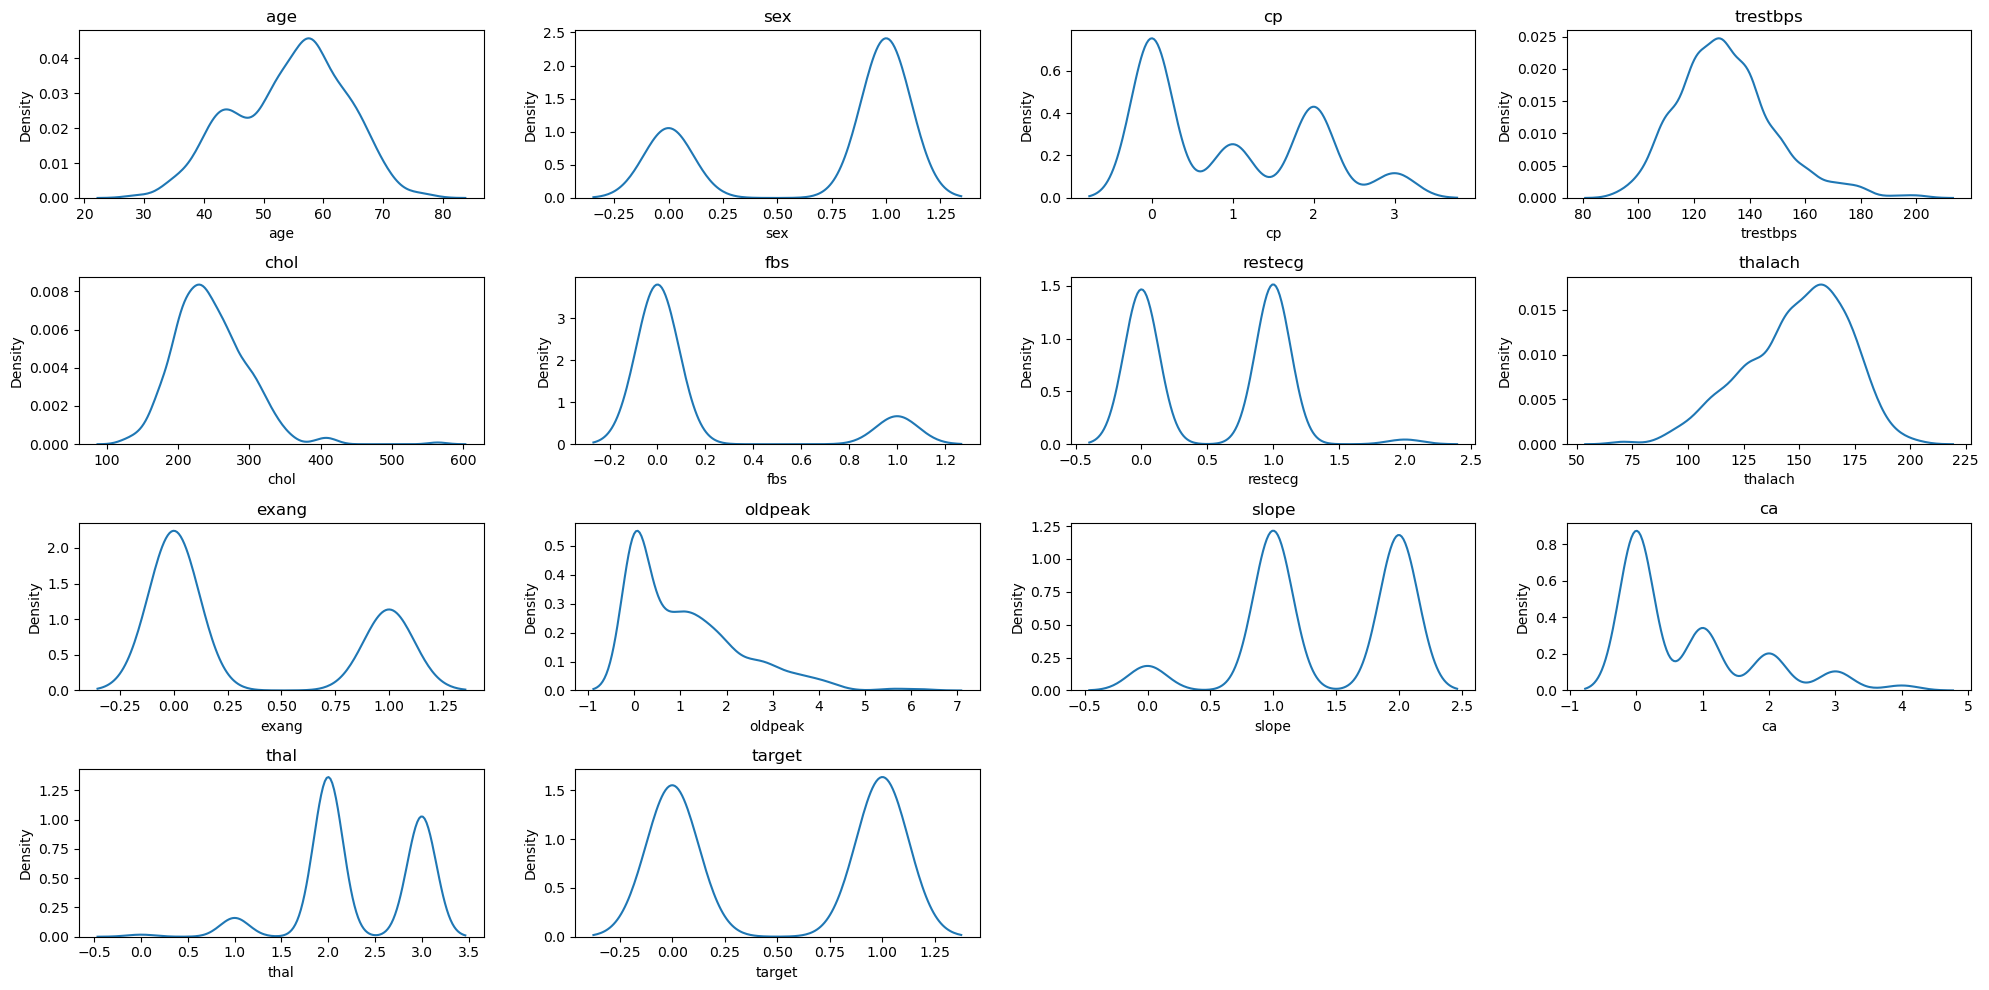

In [13]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

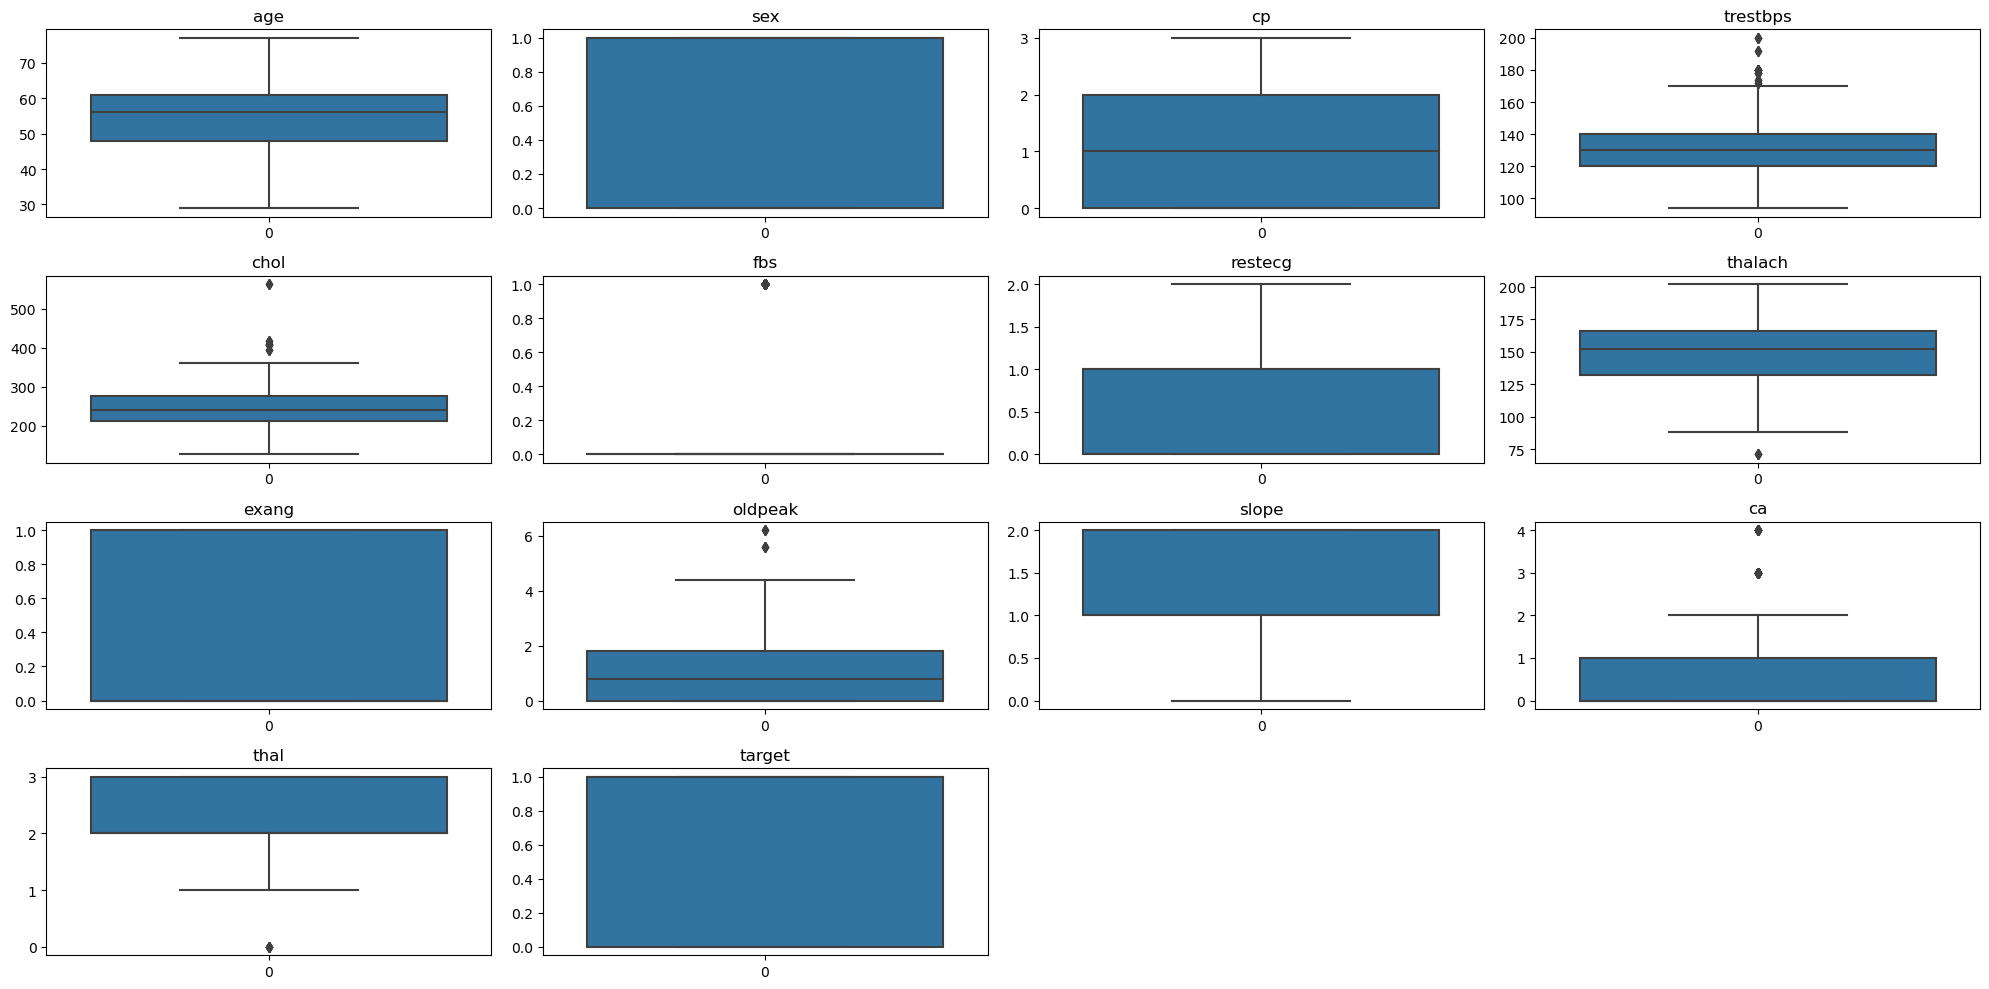

In [14]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

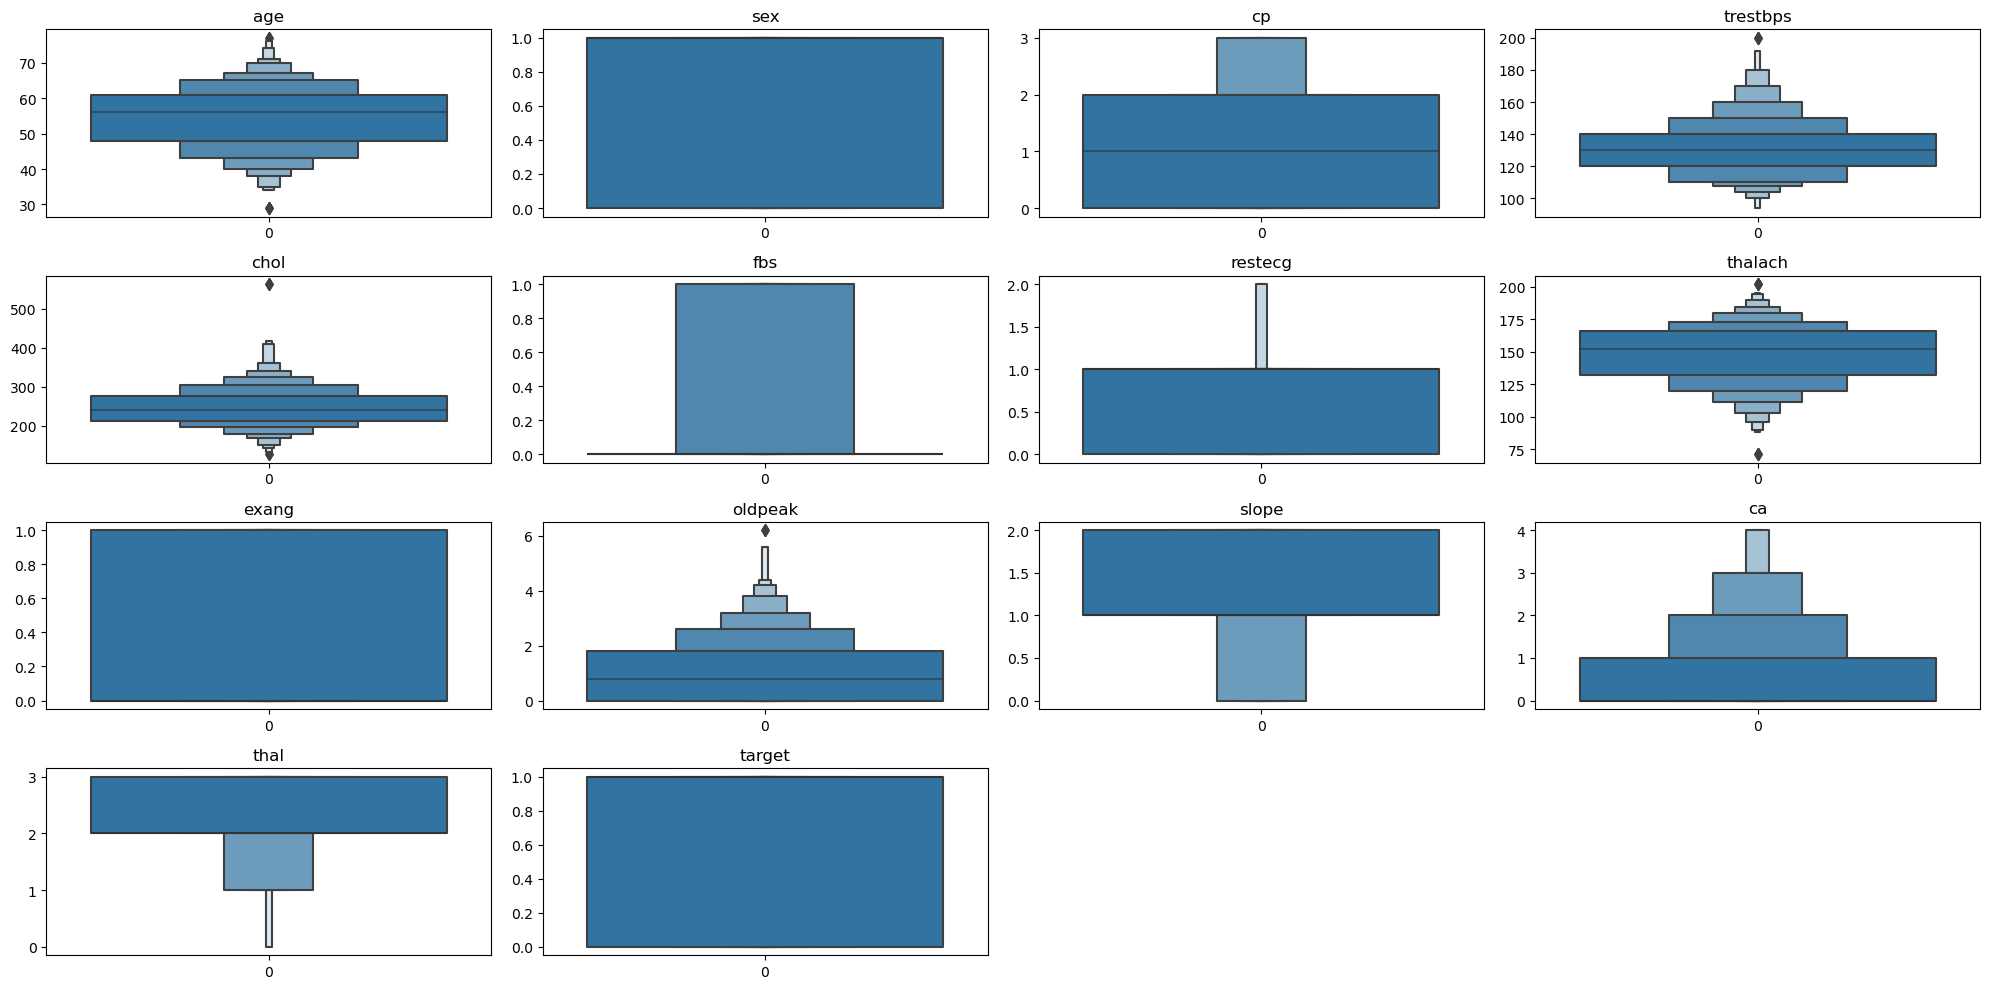

In [15]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.boxenplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

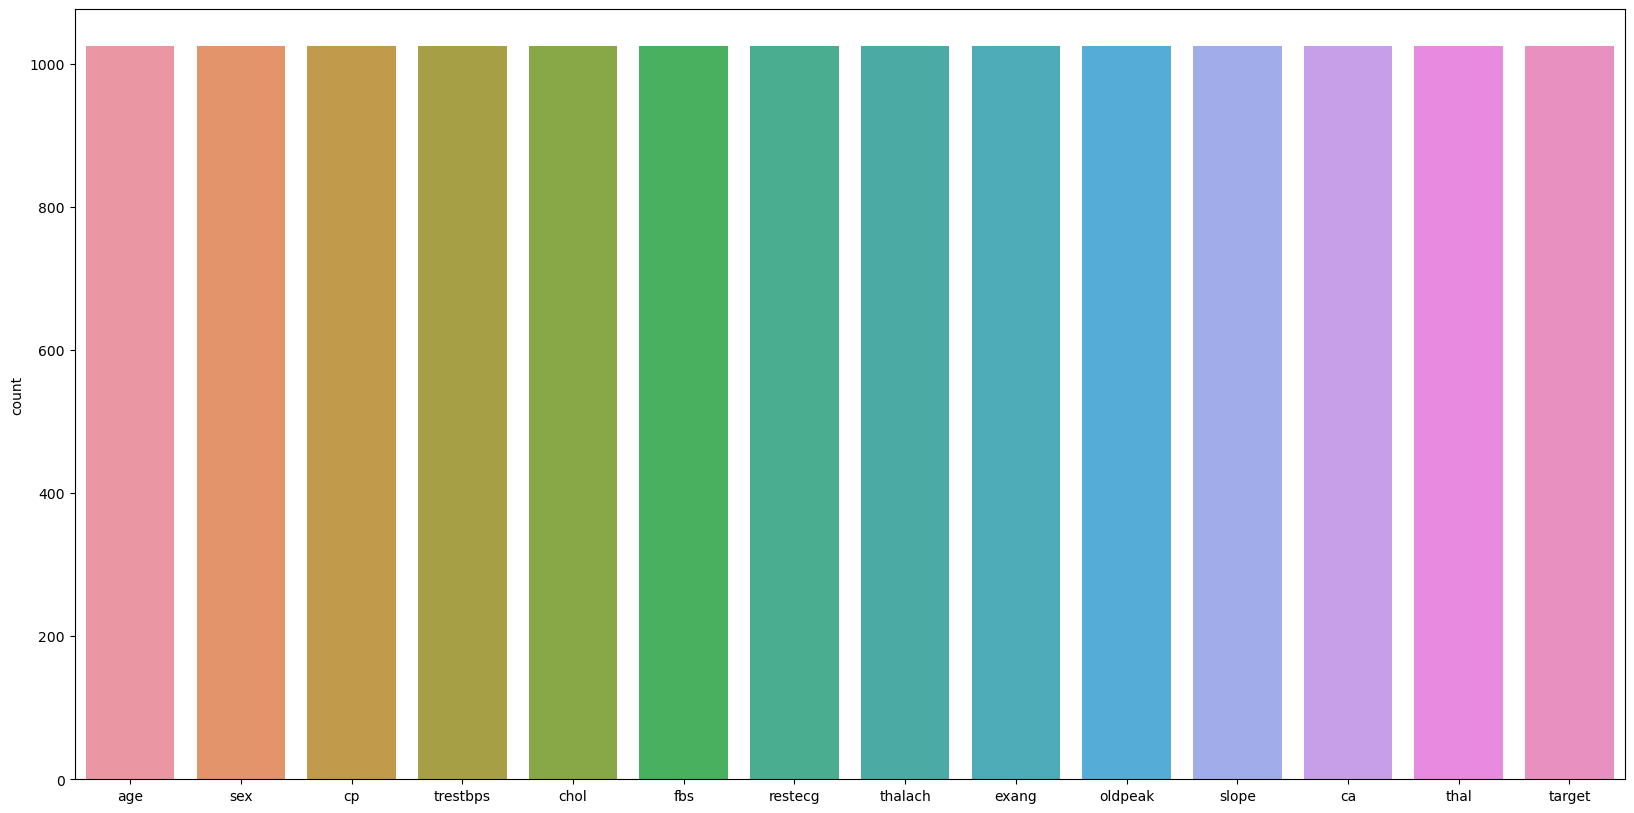

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(df)

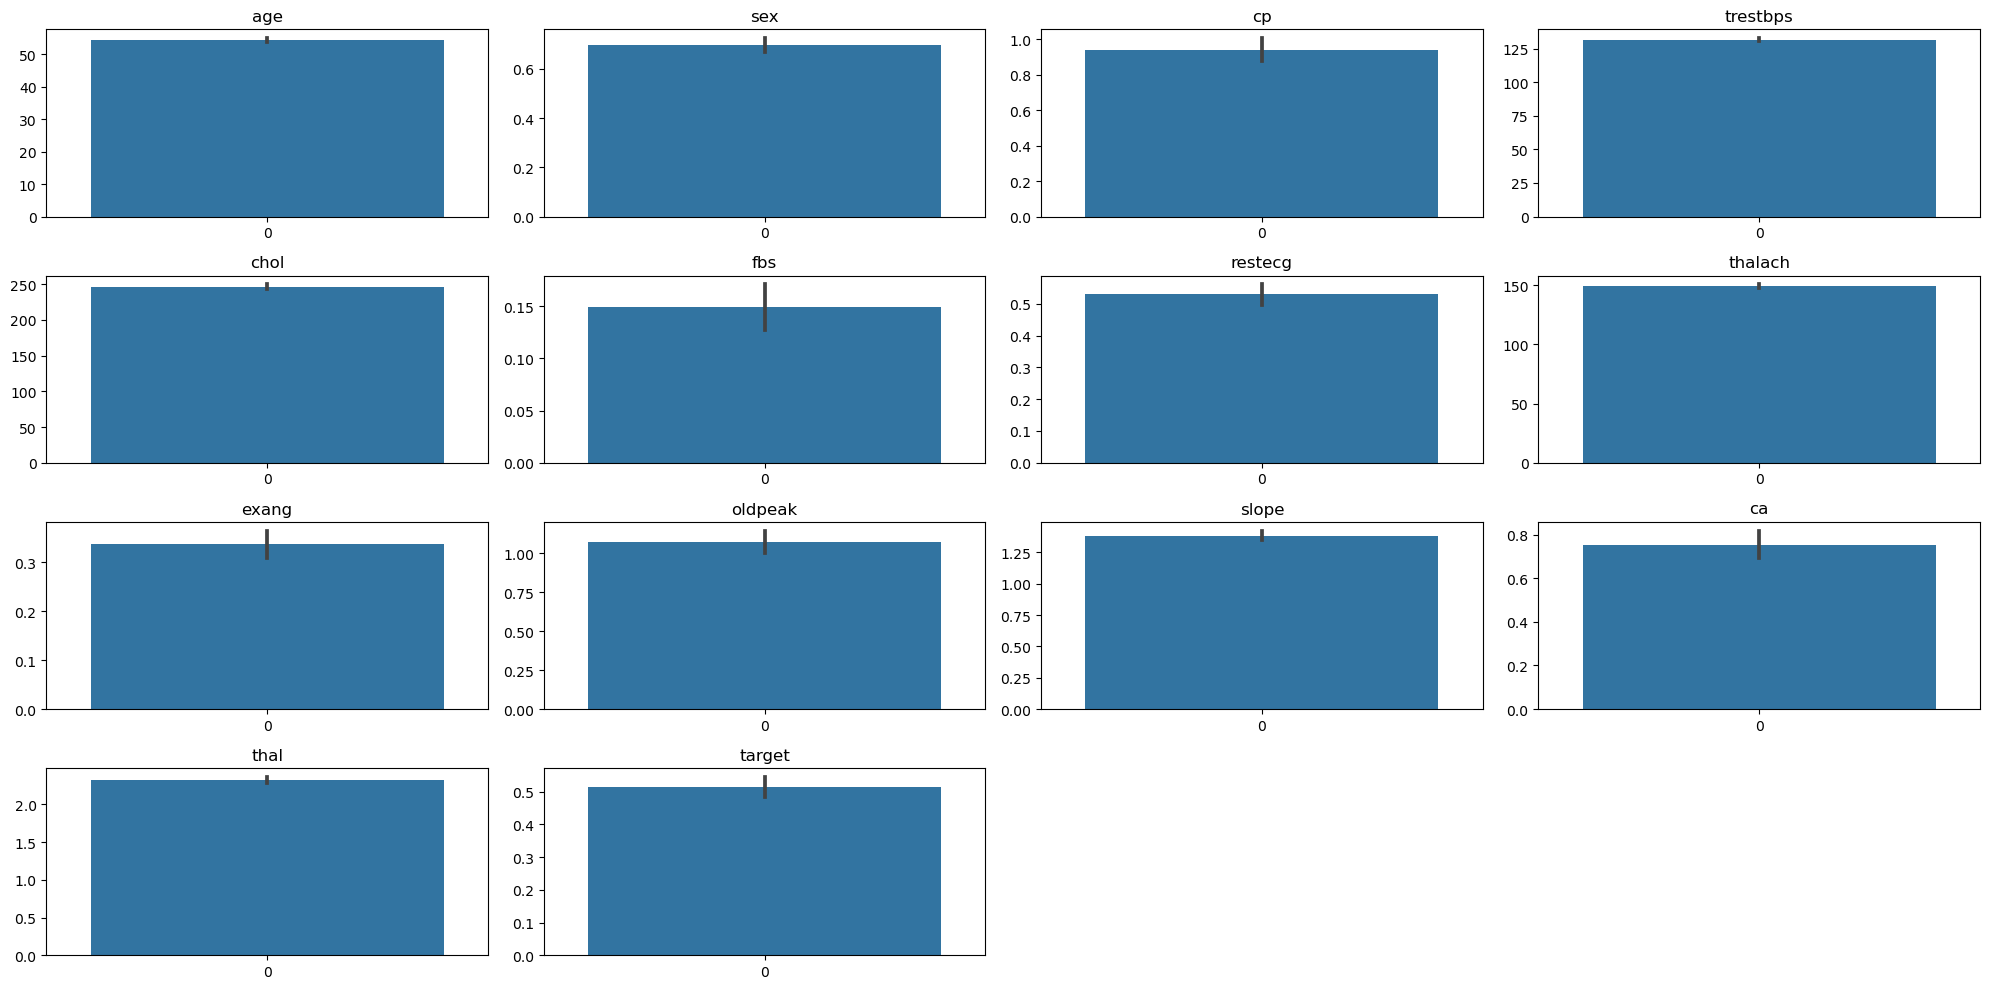

In [17]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.barplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

<Axes: >

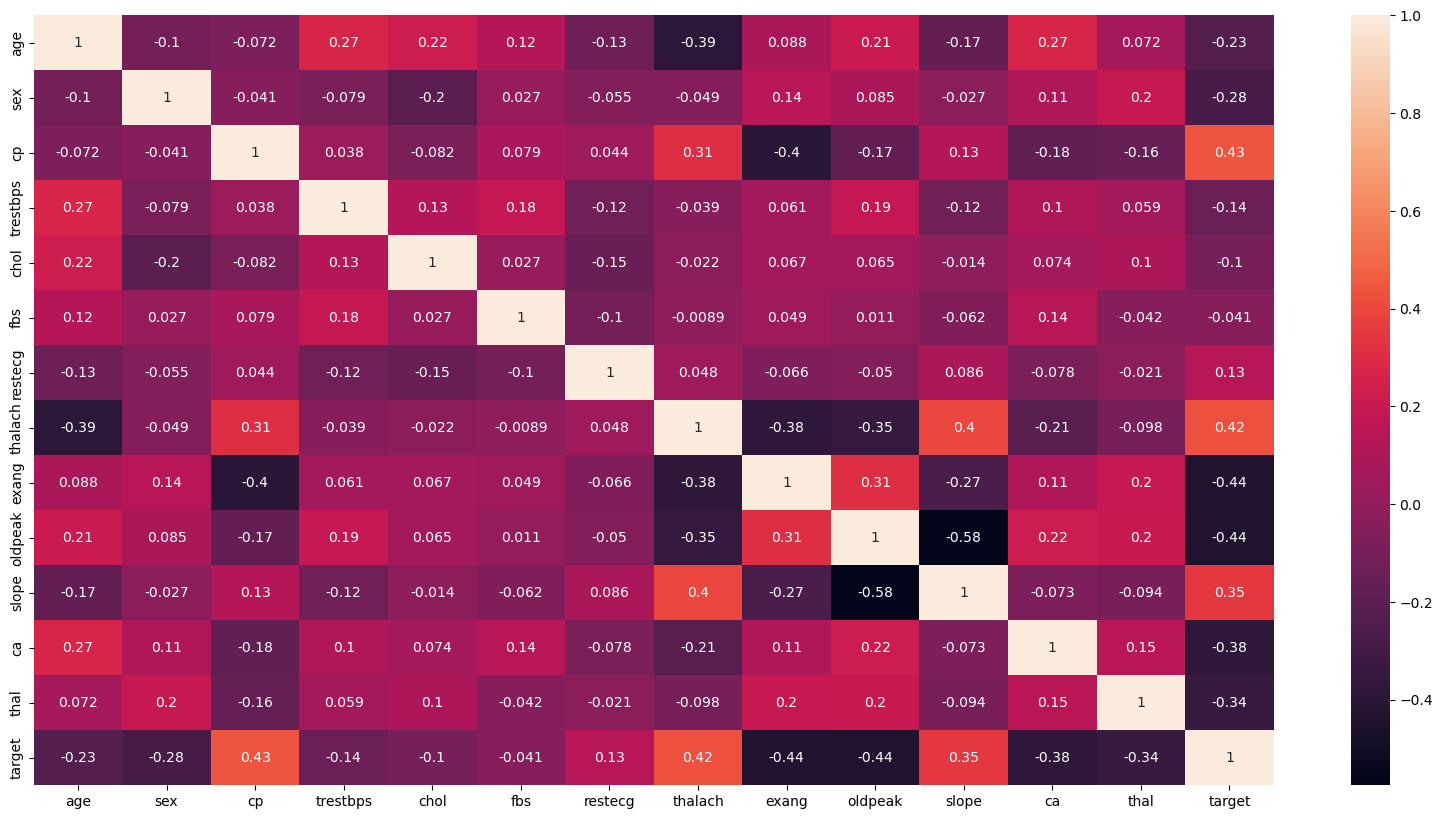

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

## 3. Data Spliting 

In [19]:
##importing the required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [20]:
X=df.drop(columns='target')
y=df['target']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 4. Train Model with Different Algorithms

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lgr=LogisticRegression()

In [24]:
tf1=ColumnTransformer(transformers=[
    ('tf1',StandardScaler(),slice(0,None))
],remainder="passthrough")

**Logistic Regression**

In [25]:
pipe_lgr=Pipeline([
    ('std',tf1),
    ('logisticReg',lgr),
])

In [26]:
pipe_lgr.fit(X_train,y_train)

Pipeline(steps=[('std',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('logisticReg', LogisticRegression())])

In [27]:
print(lgr.coef_)
print(lgr.intercept_)

[[-0.0060552  -0.83570451  0.88584283 -0.32001625 -0.44760088 -0.06259603
   0.14056561  0.65348084 -0.42007144 -0.76508976  0.34356382 -0.84761973
  -0.65693538]]
[-0.12861066]


In [28]:
y_pred_lgr=pipe_lgr.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred_lgr)

0.7951219512195122

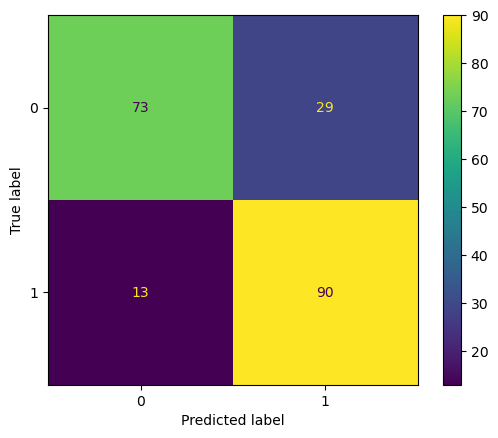

In [30]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

In [31]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [32]:
# Create the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [33]:
# Create the GridSearchCV instance
gs_lr = GridSearchCV(lgr, param_grid, cv=5)

In [34]:
# Fit the GridSearchCV
gs_lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [35]:
gs_lr.score(X_train,y_train)

0.8731707317073171

In [36]:
# Get the best parameters
gs_lr.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [37]:
y_pred_gslr=gs_lr.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred_gslr)

0.7853658536585366

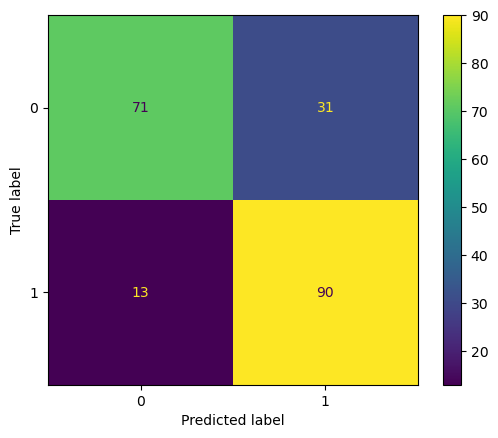

In [39]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gslr)).plot()

**KNN Classifier**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier(n_neighbors=10)

In [42]:
pipe_knn=Pipeline([
    ('tf1',tf1),
    ('knn',knn)
])

In [43]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [44]:
y_pred_knn=pipe_knn.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred_knn)

0.8390243902439024

In [46]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

**Tuning the parameters using GridSearchCV**

In [47]:
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

In [48]:
gs_knn = GridSearchCV(pipe_knn,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

In [49]:
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

In [50]:
# find best model score
gs_knn.score(X_train, y_train)

1.0

In [51]:
y_pred_knn=gs_knn.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred_knn)

0.9853658536585366

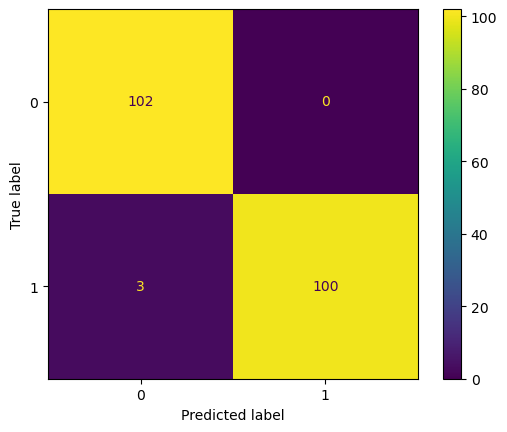

In [53]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn)).plot()

**Decision Tree classifier**

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dtc=DecisionTreeClassifier()

In [56]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('dtc',dtc)
])

In [57]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtc', DecisionTreeClassifier())])

In [58]:
y_pred_Dtc=pipe_dtc.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred_Dtc)

0.9853658536585366

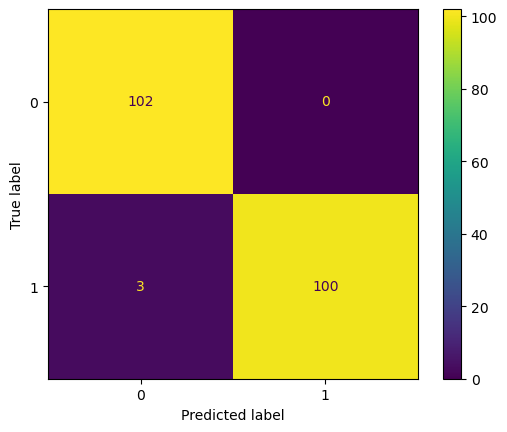

In [60]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_Dtc)).plot()

**Tuning the parameters using GridSearchCV**

In [61]:
# Create the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [62]:
# Create the GridSearchCV instance
gs_dtc = GridSearchCV(dtc, param_grid, cv=5)

In [63]:
# Fit the GridSearchCV
gs_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [64]:
# Get the best parameters
gs_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [65]:
# find best model score
gs_dtc.score(X_train, y_train)

1.0

In [66]:
y_pred_dtc=gs_dtc.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred_dtc)

0.9853658536585366

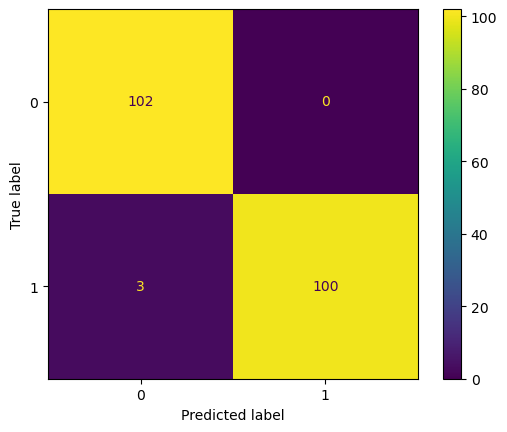

In [68]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

**Random Forest Classifier**

In [69]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [70]:
rtc=RandomForestClassifier()

In [71]:
pipe_rtc=Pipeline([
    ('tf1',tf1),
    ('rtc',rtc)
])

In [72]:
pipe_rtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('rtc', RandomForestClassifier())])

In [73]:
y_pred_rtc=pipe_rtc.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred_rtc)

0.9853658536585366

In [75]:
rtc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Hyper Tuning for Random forest classifier**

In [76]:
# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [77]:
# Create the GridSearchCV instance
gs_rfc = GridSearchCV(rtc, param_grid, cv=5)

In [78]:
# Fit the GridSearchCV
gs_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [79]:
# Get the best parameters
gs_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [80]:
gs_rfc.score(X_train,y_train)

1.0

In [81]:
y_pred_gsrfc=gs_rfc.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred_gsrfc)

0.9853658536585366

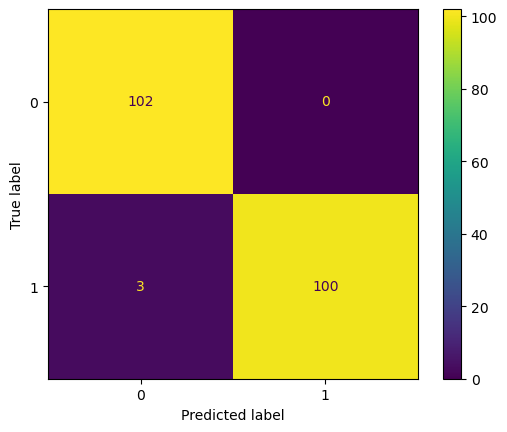

In [83]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gsrfc)).plot()

In [84]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
875,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
113,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0


In [85]:
gs_rfc.predict(pd.DataFrame([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]],columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']))

array([0])

In [86]:
gs_rfc.predict(pd.DataFrame([[54,1,0,122,286,0,0,116,1,3.2,1,2,2]],columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']))

array([0])

In [87]:
gs_rfc.predict(pd.DataFrame([[45,1,0,104,208,0,0,148,1,3.0,1,0,2]],columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']))

array([1])

In [88]:
gs_rfc.predict(pd.DataFrame([[10,2,5,10,21,0,1,68,0,1.0,0,1,4]],columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']))

array([0])

In [89]:
d={
    'Model Name':['Logistic Regression','K Nearest Neighber','Decision Tree Classifier','Random Forest Classifier'],
    'Score':[accuracy_score(y_test,y_pred_lgr),accuracy_score(y_test,y_pred_knn) ,accuracy_score(y_test,y_pred_gsrfc),accuracy_score(y_test,y_pred_dtc)]
}

In [90]:
pd.DataFrame(d)

,Model Name,Score
0,Logistic Regression,0.795122
1,K Nearest Neighber,0.985366
2,Decision Tree Classifier,0.985366
3,Random Forest Classifier,0.985366


#### **Dumping the our ideal model from these three (like :- K Nearest Neighber, Decision Tree Classifier , Random Forest Classifier) because these is equal, so I will be choose random forest as our ideal model**

In [91]:
import pickle as pkl

In [92]:
pkl.dump(gs_rfc,open("Ideal_model.pkl","wb"))

In [93]:
ideal_model=pkl.load(open("Ideal_model.pkl","rb"))

In [94]:
ideal_model.predict(pd.DataFrame([[10,2,5,10,21,0,1,68,0,1.0,0,1,4]],columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']))

array([0])